In [122]:
import pandas as pd 
import numpy as np
#impot counter 
from collections import Counter
# import matplotlib
import matplotlib.pyplot as plt
# seaborn import 
import seaborn as sns

In [123]:
rank1 = pd.read_csv('kinase_ranked_1.csv')
#make ranked_1 all uppercase
rank1['ranked_1'] = rank1['ranked_1'].str.upper()   
rank1.head()

,Uniprot Primary Accession,Protein,Phosphosite,SITE_+/-7_AA,ranked_1
0,A0A0B4J1R7,A0A0B4J1R7,T6,__MMATGTPESQARF,AAK1
1,A0A1B0GUI2,A0A1B0GUI2,T185,KTPTLQPTPEVHNGL,AAK1
2,A0A1B0GUI2,A0A1B0GUI2,T763,RRLSSASTGKPPLSV,AAK1
3,A6H8Y1,BDP1,T2081,EKVKENATPTRNTIS,AAK1
4,A6NC98,CC88B,T1366,EGREADGTGSPSPAP,AAK1


In [124]:
rank1['lenght_of_sequence'] = rank1['SITE_+/-7_AA'].str.len()
rank1['lenght_of_sequence'].value_counts()  

15    92567
Name: lenght_of_sequence, dtype: int64

In [125]:
# check if '_' is present in the column SITE_+/-7_AA
rank1['SITE_+/-7_AA'].str.contains('_').value_counts()

False    89635
True      2932
Name: SITE_+/-7_AA, dtype: int64

In [126]:
rank1 = rank1[~rank1['SITE_+/-7_AA'].str.contains('_')]

In [127]:
scop3p = pd.read_csv('../data/UnknownKinaseMotif.txt', sep='\t')
# make all Family name in upper case
scop3p['Family'] = scop3p['Family'].str.upper()
scop3p.head()

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,+/-7AA
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA
2,O43318,A0AUZ9,540,MLK,MAP3K7,756,LSRIQNSSRNTARRR
3,O14578,A0AV96,270,DMPK,CIT,453,IPAIGAQYSMFPAAP
4,O14578,A0AV96,270,DMPK,CIT,519,PFQGRPITPVYTVAP


In [128]:
scop3p['length_of_sequence'] = scop3p['+/-7AA'].str.len()
scop3p['length_of_sequence'].value_counts()

15.0    64978
9.0       135
14.0      130
13.0      121
10.0      107
12.0      106
11.0      106
8.0       102
Name: length_of_sequence, dtype: int64

In [131]:
# common between rank1['SITE_+/-7_AA'] and scop3p['+/-7AA']
common = set(rank1['ranked_1']).intersection(scop3p['Family'])
common

{'CDC7', 'KIS', 'MOS', 'PDK1', 'TTK'}

In [107]:
#rename colum +/-7AA to SITE_+/-7_AA
scop3p = scop3p.rename(columns = {'+/-7AA':'SITE_+/-7_AA'})

In [108]:
scop3p = scop3p[scop3p['length_of_sequence'] == 15]

In [109]:
need_family =['apk']

In [110]:
def create_pssm(df, kinase_col, sequence_col, limited_family = True, verbose = True):

    #capitalize evreything in the sequence_col column
    df[sequence_col] = df[sequence_col].str.upper()

    # Group by 'KINASE_psp' and combine all sequences into a list
    kinase_sequences = df.groupby(kinase_col)[sequence_col].apply(list)

    # Initialize an empty dictionary to store the Logos for each kinase
    data_store = {}

    # For each kinase, create a position frequency matrix and then a sequence logo
    for kinase, sequences in kinase_sequences.items():
        if kinase not in need_family and limited_family:
            # print(f"kinase {kinase} is not here") 
            continue 
        if verbose: 
            print(f"for {kinase} all the sequences are {kinase_sequences[kinase]}")

        # Combine sequences into a single string for each position
        try: 
            aligned_sequences = [''.join(seq) for seq in zip(*sequences)]
            if len(aligned_sequences) != 15:
                continue
        except:
            continue
        
        # Create a DataFrame where each row corresponds to one position
        position_df = pd.DataFrame([Counter(pos) for pos in aligned_sequences]).fillna(0)
        
        # Normalize the counts to get frequencies
        position_freq_matrix = position_df.div(position_df.sum(axis=0), axis=1)
        
        data_store[kinase] = position_freq_matrix
    # print(data_store)

    return data_store

In [111]:
scop3p['SITE_+/-7_AA'].str.upper()

0        NSQPEKMSQEPEINK
1        EDLLRENSMLREEIA
2        LSRIQNSSRNTARRR
3        IPAIGAQYSMFPAAP
4        PFQGRPITPVYTVAP
              ...       
66377    PQSSPTSTPKLSKSL
66378    STPKLSKSLSFEMQQ
66379    PKLSKSLSFEMQQDE
66380    ELIEKPMSPMQYARS
66381    IVGGSDPYGQKGLKN
Name: SITE_+/-7_AA, Length: 64978, dtype: object

In [112]:
all_sequences = sorted({c for c in scop3p['SITE_+/-7_AA'].str.upper().str.cat() })

In [113]:
rank1.head(2)

,Uniprot Primary Accession,Protein,Phosphosite,SITE_+/-7_AA,ranked_1,lenght_of_sequence
1,A0A1B0GUI2,A0A1B0GUI2,T185,KTPTLQPTPEVHNGL,AAK1,15
2,A0A1B0GUI2,A0A1B0GUI2,T763,RRLSSASTGKPPLSV,AAK1,15


In [ ]:
rank1_pssm = create_pssm(rank1, 'ranked_1', 'SITE_+/-7_AA', limited_family=False)

In [115]:
scop3p.head(2)

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,SITE_+/-7_AA,length_of_sequence
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK,15.0
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA,15.0


In [ ]:
scop3p_pssm = create_pssm(scop3p, 'Family', 'SITE_+/-7_AA', limited_family=False)

In [117]:
common_family = set(rank1_pssm.keys()).intersection(set(scop3p_pssm.keys()))

In [118]:
common_family

{'CDC7', 'KIS', 'MOS', 'PDK1', 'TTK'}

In [119]:
def add_missing_columns(pssm1, all_sequences):
    for col in all_sequences:
        if col not in pssm1.columns:
            pssm1[col] = -1
    return pssm1

In [120]:
def plotting_pssm(psp, johnson, common_family, title1 = 'PSP', title2 = 'Johnson'):

    for family in common_family:
        pssm1 = psp[family]
        pssm2 = johnson[family]

        # Add missing columns to the PSSMs
        pssm1 = add_missing_columns(pssm1, all_sequences)
        pssm2 = add_missing_columns(pssm2, all_sequences)

        pssm1 = pssm1.T.sort_index()
        pssm2 = pssm2.T.sort_index()  


        #if pssm1.shape[1] != pssm2.shape[1]:
        #  print(family, f'{title1} and {title2} data have different lengths')
        #  print(f"{title1} is {pssm1.shape[1]} and {title2} is {pssm2.shape[1]}")
        # print(f"{title1} columns: {pssm1.columns} and {title2} columns: {pssm2.columns}")
        # print("----------------------------------------")
        # continue

        # make the columns match
        try:
            # ecluedian distance
            distances = np.sqrt(np.sum((pssm1 - pssm2) ** 2, axis=1))
            # Plotting the PSSMs and distances
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            # set figure title 
            fig.suptitle(family)

            sns.heatmap(pssm1, ax=axes[0], cmap='viridis', cbar=True)
            axes[0].set_title(title1)

            sns.heatmap(pssm2, ax=axes[1], cmap='viridis', cbar=True)
            axes[1].set_title(title2)

            axes[2].plot(distances, marker='o')
            axes[2].set_title('Euclidean Distance per Position')
            axes[2].set_xlabel('Amino Acid sequence')
            axes[2].set_ylabel('Euclidean Distance')

            # Set x-ticks to the row indices of pssm1 or pssm2
            row_indices = pssm1.index
            axes[2].set_xticks(range(len(row_indices)))
            axes[2].set_xticklabels(row_indices, rotation=45)

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(family, e)
    

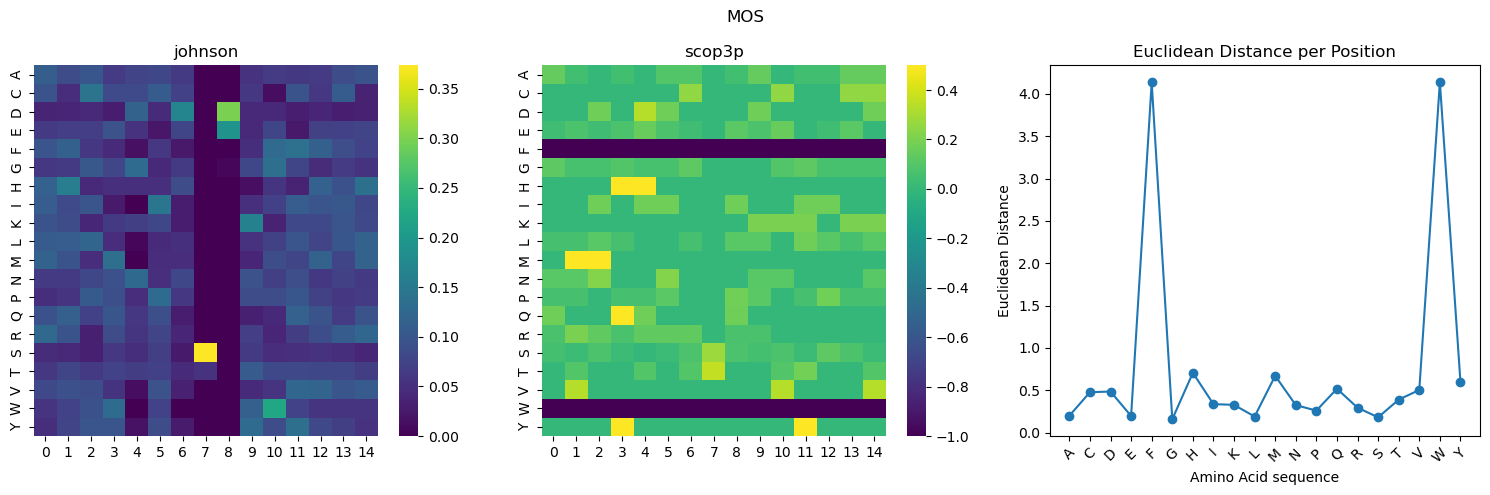

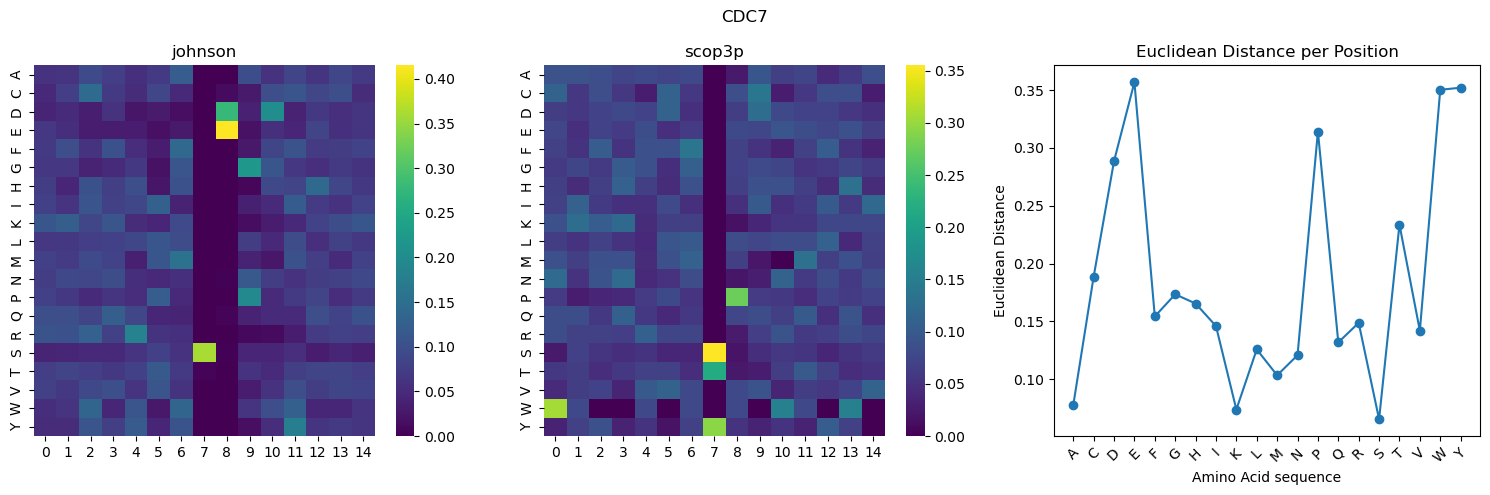

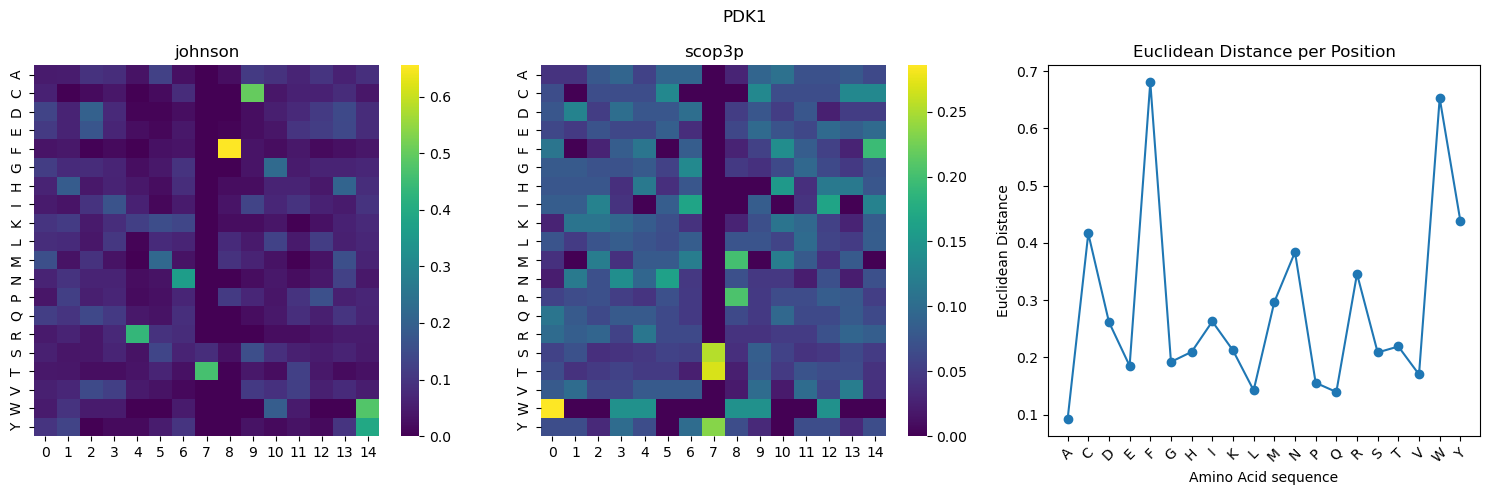

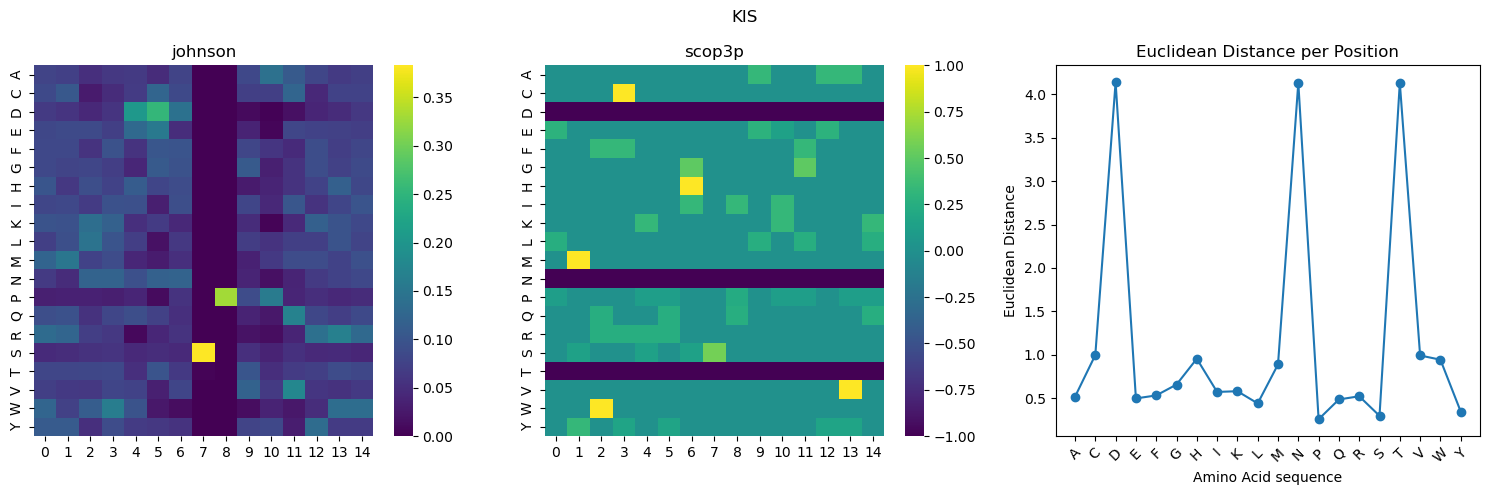

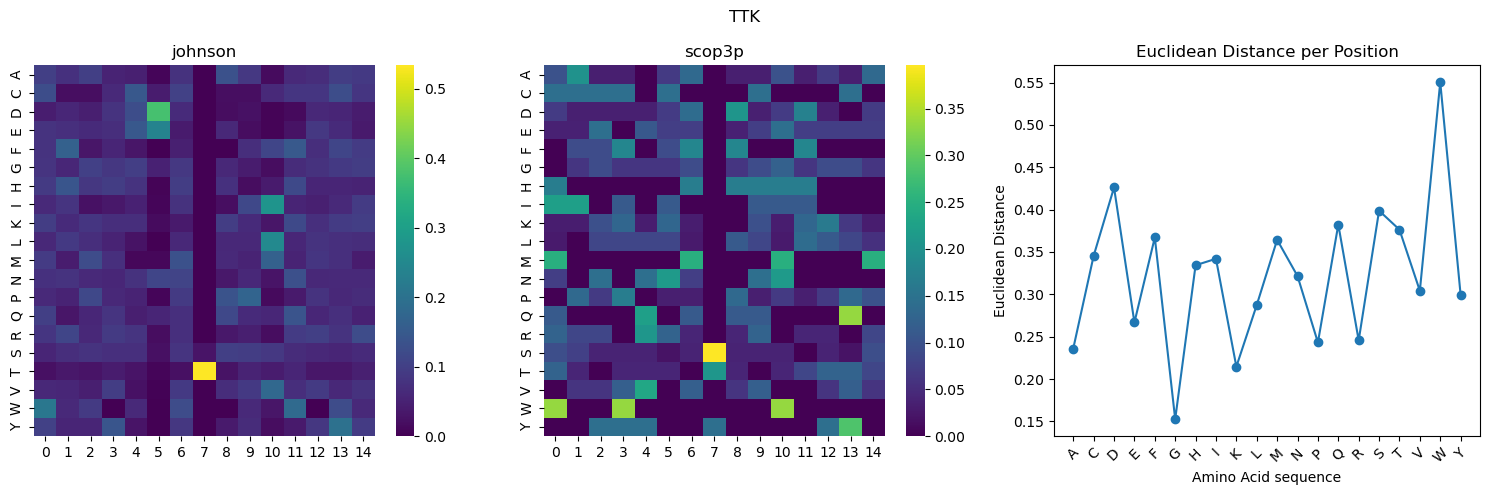

(None,)

In [132]:
plotting_pssm(rank1_pssm, scop3p_pssm, common_family, title1="johnson", title2="scop3p"), 